# Project Description and Objective
### This Program will output a wordcloud of all words in a database of scripts. Then, it will be compared to the 50 most common words in the spoken English language, also organized into a wordcloud. The goal is to determine the similarities between movie scripts, and real dialogue.

In [ ]:
%pip install wordcloud

## Script WordCloud

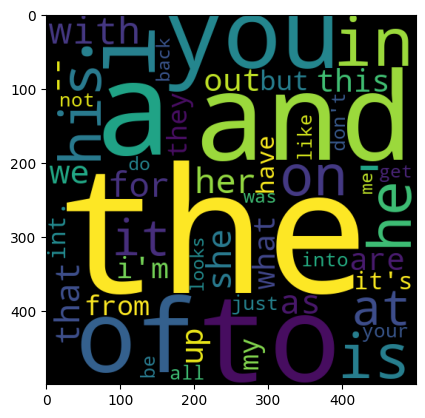

In [4]:
%matplotlib inline
from bs4 import BeautifulSoup
import pandas as pd
import requests
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

urloriginal = "https://imsdb.com/genre/Comedy"
urloriginal2 = "https://imsdb.com/all-scripts.html"
baseurl = "https://imsdb.com"
#gets the text format of the page required
def get_script(baseurl, endpoint, startpoint):

    try:
        #Dealing with the first page
        url1 = baseurl + endpoint
        response1 = requests.get(url1)
        endpoint2 = BeautifulSoup(response1.content, "html.parser").find("a", 
                                string = lambda text: text and "Read" in text, 
                                href = lambda href: href and "/scripts/" in href
                                )
        #second page
        url2 = (baseurl + endpoint2.attrs["href"])
        response2 = requests.get(url2)
        return BeautifulSoup(response2.content, "html.parser").find("td", class_ = "scrtext").find("pre").text
    except Exception as e:

        #if anything gets messed up
        return None

def write_file(text):
    with open(f"ZZZProject/DataAnalysis/data/IMSDB.txt", "a", encoding="utf-8") as filing:
        filing.write(text)
    return None




#getting each script for each endpoint
def everything(urloriginal):

    #map with all of the names and frequencies
    nameCounter = Counter()
    #getting the main page
    response = requests.get(urloriginal).content
    soup = BeautifulSoup(response, "html.parser")
    x = soup.find("body").find_all("table", recursive= False)[1].find("tr", recursive = False)
    list_of_tags = x.find_all("a", href = lambda href: href and "Script.html" in href)


    list_of_endpoints = []
    for tag in list_of_tags:
        list_of_endpoints.append(tag.attrs["href"])
    
    for i, script in enumerate(list_of_endpoints):
        script_text = get_script(baseurl, script, "ALL Movie")
        if script_text is not None: 
            nameCounter = nameCounter + Counter(script_text.lower().split())


    wordcloud = WordCloud(max_words = 50, width = 500, height = 500).generate_from_frequencies(dict(nameCounter))
    plt.imshow(wordcloud)
    plt.show()
    return None


everything(urloriginal)

## English Language WordCloud

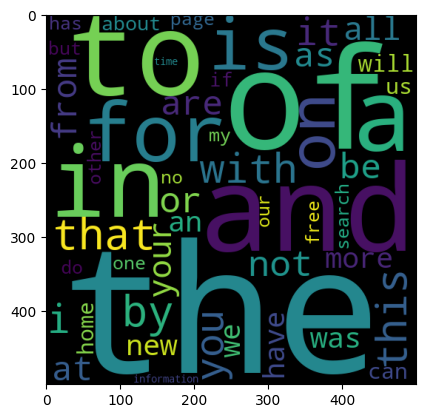

In [12]:
%matplotlib inline
#already downloaded dataset from kaggle
import pandas as pd
#the filePath
filePath = "unigram_freq.csv"

df = pd.read_csv(filePath)

wordFrequencies = dict(zip(df["word"], df["count"]))

df = df.head(50)
wordcloud = WordCloud(max_words = 50, width = 500, height = 500).generate_from_frequencies(dict(wordFrequencies))
plt.imshow(wordcloud)
plt.show()

#### The two distributions appear to be almost identical. Although it appears to be rather intuitive, this is a solid reminder that often-times the most famous and relevant movies mimic natural language. This is most likely to make the movie appear more real, and therefore, more compelling.